<a href="https://colab.research.google.com/github/DevNicque/pos-datascience/blob/main/Trabalho_de_An%C3%A1lise_e_Visualiza%C3%A7%C3%A3o_de_Dados_ANDREA_MONICQUE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bibliotecas**

In [2]:
! pip install pydataset
! pip install geopandas

     |████████████████████████████████| 15.9MB 284kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-cp37-none-any.whl size=15939431 sha256=2372c40f00cbe01e898a33cd177ee936f6a027bde67e36091474d0af20439c76
  Stored in directory: /root/.cache/pip/wheels/fe/3f/dc/5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset
     |████████████████████████████████| 1.0MB 5.8MB/s 
     |████████████████████████████████| 15.3MB 303kB/s 
     |████████████████████████████████| 6.5MB 40.9MB/s 


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date,datetime
import geopandas as gpd
import seaborn as sns
from pydataset import data

%matplotlib inline

initiated datasets repo at: /root/.pydataset/


#**Importação**

In [232]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


**Dataset Robey** 
- Demonstra dados de fertilidade e contracepção em Países das Regiões da África, Ásia, América Latina e Oriente Médio
- Fonte: pydataset




In [239]:
df_fertilidade = data('Robey')

**Dataset Focos de queimadas no Brasil** 
- Este demonstra ocorrências de queimadas nos biomas brasileiros durante o ano de 2020
- Fonte: Kaggle




In [238]:
df_queimadas = pd.read_csv('Focos_2020-01-01_2020-12-31.csv')

#**Análise Dataset Robey** 
- Fonte: Pydataset




In [241]:
df_fertilidade = data('Robey')
df_fertilidade.head()

,region,tfr,contraceptors
Botswana,Africa,4.8,35
Burundi,Africa,6.5,9
Cameroon,Africa,5.9,16
Ghana,Africa,6.1,13
Kenya,Africa,6.5,27


In [242]:
df_fertilidade = df_fertilidade.reset_index()
df_fertilidade.columns=['pais','regiao','taxa_fertilidade','qtd_contraceptivos']

In [243]:
set(df_fertilidade.regiao)

{'Africa', 'Asia', 'Latin.Amer', 'Near.East'}

In [245]:
df_fertilidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pais                50 non-null     object 
 1   regiao              50 non-null     object 
 2   taxa_fertilidade    50 non-null     float64
 3   qtd_contraceptivos  50 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [244]:
df_fertilidade.describe()

,taxa_fertilidade,qtd_contraceptivos
count,50.000000,50.00000
mean,4.688000,37.44000
std,1.453446,22.89832
min,1.700000,4.00000
25%,3.600000,12.25000
50%,4.600000,41.00000
75%,5.975000,55.00000
max,7.300000,77.00000


In [246]:
df_fertilidade.sort_values(['taxa_fertilidade'], ascending=False, inplace=True, ignore_index=True)
df_fertilidade.head(10)

,pais,regiao,taxa_fertilidade,qtd_contraceptivos
0,Niger,Africa,7.3,4
1,Uganda,Africa,7.2,5
2,Yemen,Near.East,7.0,7
3,Mali,Africa,6.8,5
4,Burundi,Africa,6.5,9
5,Kenya,Africa,6.5,27
6,Liberia,Africa,6.4,6
7,Senegal,Africa,6.4,12
8,Zambia,Africa,6.3,15
9,Togo,Africa,6.1,12


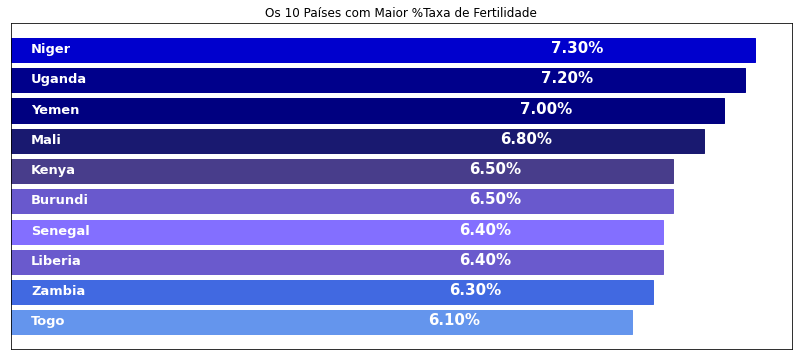

In [247]:
df_temp = df_fertilidade[0:10].sort_values(by='taxa_fertilidade')

x = df_temp.pais.values
y = df_temp.taxa_fertilidade

#colors = ['#0000CD', '#00008B', '#000080', '#191970', '#483D8B','#6959CD','#836FFF','#6A5ACD','#4169E1','#6495ED']
colors = ['#6495ED', '#4169E1', '#6A5ACD', '#836FFF', '#6959CD','#483D8B','#191970','#000080','#00008B','#0000CD']
font_colors = ['w', 'w', 'w', 'w','w', 'w','w', 'w','w', 'w']

fig, ax = plt.subplots(figsize=(14,6)) 

for i, value in enumerate(y):
    ax.text(0.2, i-.1, x[i], fontdict={'color':font_colors[i], 'size':13, 'weight':'bold'})
    ax.text(value-2, i-.1, '%.2f%%'%(value), fontdict={'color':font_colors[i], 'size':15, 'weight':'bold'})

barlist = plt.barh(x, y)
for i,bar in enumerate(barlist):
    barlist[i].set_color(colors[i])

plt.xticks([])
plt.yticks([])
plt.title('Os 10 Países com Maior %Taxa de Fertilidade')
plt.show()

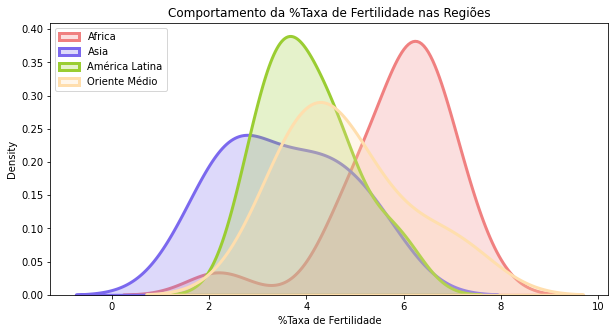

In [248]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_fertilidade[df_fertilidade['regiao'] == 'Africa'].taxa_fertilidade, shade=True, color='#F08080',linewidth=3, label='Africa')
sns.kdeplot(df_fertilidade[df_fertilidade['regiao'] == 'Asia'].taxa_fertilidade, shade=True, color='#7B68EE',linewidth=3, label='Asia')
sns.kdeplot(df_fertilidade[df_fertilidade['regiao'] == 'Latin.Amer'].taxa_fertilidade, shade=True, color='#9ACD32',linewidth=3, label='América Latina')
sns.kdeplot(df_fertilidade[df_fertilidade['regiao'] == 'Near.East'].taxa_fertilidade, shade=True, color='#FFDEAD',linewidth=3, label='Oriente Médio')
plt.legend(loc='upper left')
plt.xlabel('%Taxa de Fertilidade')
plt.title('Comportamento da %Taxa de Fertilidade nas Regiões')
plt.show()

#**Análise Dataset Focos de Queimadas no Brasil** 
- Fonte: https://www.kaggle.com/aliceadativa/queimadas-brasil-2020?select=Focos_2020-01-01_2020-12-31.csv





In [249]:
df_queimadas.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0
1,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,42.0,0.0,0.9,-15.911,-48.864,9.5
2,2020/07/11 16:45:00,AQUA_M-T,Brasil,RIO DE JANEIRO,CANTAGALO,Mata Atlantica,38.0,0.0,0.8,-21.897,-42.340,13.0
3,2020/07/11 16:50:00,AQUA_M-T,Brasil,MINAS GERAIS,MATIAS CARDOSO,Caatinga,46.0,0.0,1.0,-14.838,-43.881,17.6
4,2020/07/11 16:50:00,AQUA_M-T,Brasil,PARA,OBIDOS,Amazonia,0.0,0.4,0.2,-1.823,-55.207,18.7


In [250]:
df_queimadas.shape

(222797, 12)

In [251]:
df_queimadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222797 entries, 0 to 222796
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datahora      222797 non-null  object 
 1   satelite      222797 non-null  object 
 2   pais          222797 non-null  object 
 3   estado        222797 non-null  object 
 4   municipio     222797 non-null  object 
 5   bioma         222797 non-null  object 
 6   diasemchuva   217727 non-null  float64
 7   precipitacao  217727 non-null  float64
 8   riscofogo     217727 non-null  float64
 9   latitude      222797 non-null  float64
 10  longitude     222797 non-null  float64
 11  frp           220164 non-null  float64
dtypes: float64(6), object(6)
memory usage: 20.4+ MB


In [252]:
df_queimadas.describe()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
count,217727.000000,217727.000000,217727.000000,222797.000000,222797.000000,220164.000000
mean,20.614338,0.706719,-5.033625,-11.170909,-53.032945,66.164066
std,82.961591,3.034363,75.652691,6.460917,7.454275,146.748061
min,-999.000000,0.000000,-999.000000,-33.557000,-73.669000,0.000000
25%,3.000000,0.000000,0.400000,-15.914000,-57.393000,15.700000
50%,10.000000,0.000000,1.000000,-9.805000,-52.925000,29.700000
75%,36.000000,0.000000,1.000000,-6.647000,-47.386000,63.200000
max,120.000000,125.500000,1.000000,5.149000,-34.823000,8589.800000


In [253]:
queimadas_brasil_2020['bioma'].unique()

array(['Cerrado', 'Mata Atlantica', 'Caatinga', 'Amazonia', 'Pantanal',
       'Pampa'], dtype=object)

In [271]:
df_queimadas["data"] = df_queimadas.datahora.apply(lambda x : datetime.strptime(x[:10],'%Y/%m/%d').date())
df_queimadas["mes"] = df_queimadas.data.apply(lambda x : x.month)

In [275]:
df_queimadas.head(3)

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,mes,data
0,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,43.0,0.0,1.0,-15.914,-48.868,11.0,7,2020-07-11
1,2020/07/11 16:50:00,AQUA_M-T,Brasil,GOIAS,CORUMBA DE GOIAS,Cerrado,42.0,0.0,0.9,-15.911,-48.864,9.5,7,2020-07-11
2,2020/07/11 16:45:00,AQUA_M-T,Brasil,RIO DE JANEIRO,CANTAGALO,Mata Atlantica,38.0,0.0,0.8,-21.897,-42.340,13.0,7,2020-07-11


- Gerando dataframe com o total de queimadas dos biomas do último semestre

In [277]:
queimadas_bioma_mes = df_queimadas.groupby(['mes', 'bioma']).size().reset_index(name="total_queimadas")
queimadas_bioma_mes.columns = ['mes','bioma','total_queimadas']


queimadas_bioma_mes.head(10)

,mes,bioma,total_queimadas
0,1,Amazonia,1200
1,1,Caatinga,293
2,1,Cerrado,662
3,1,Mata Atlantica,421
4,1,Pampa,25
5,1,Pantanal,265
6,2,Amazonia,1196
7,2,Caatinga,62
8,2,Cerrado,709
9,2,Mata Atlantica,454


In [279]:
queimadas_ultimo_semestre2020 = queimadas_bioma_mes[(queimadas_bioma_mes['mes']>= 6) & (queimadas_bioma_mes['mes']<= 12)].sort_values(by='total_queimadas', ascending=False)
queimadas_ultimo_semestre2020.head(10)

,mes,bioma,total_queimadas
48,9,Amazonia,32017
42,8,Amazonia,29307
50,9,Cerrado,21802
54,10,Amazonia,17326
56,10,Cerrado,13440
44,8,Cerrado,10155
53,9,Pantanal,8106
36,7,Amazonia,6803
60,11,Amazonia,6321
47,8,Pantanal,5935


##**Gráfico Empilhado**

In [280]:
biomas = queimadas_ultimo_semestre2020.bioma.unique()
meses = queimadas_ultimo_semestre2020.mes.unique()

dados = {}

for bioma in biomas:
    dados[bioma] = queimadas_ultimo_semestre2020[queimadas_ultimo_semestre2020['bioma']==bioma]['total_queimadas'].values
df_col_emp = pd.DataFrame(dados, index=meses)
df_col_emp

,Amazonia,Cerrado,Pantanal,Caatinga,Mata Atlantica,Pampa
9,32017,21802,8106,5226,4279,380
8,29307,13440,5935,3037,4079,88
10,17326,10155,2856,2686,2553,83
7,6803,5663,1684,1912,1322,67
11,6321,3487,778,838,802,67
6,3484,2957,406,265,676,45
12,2248,1415,223,83,336,38


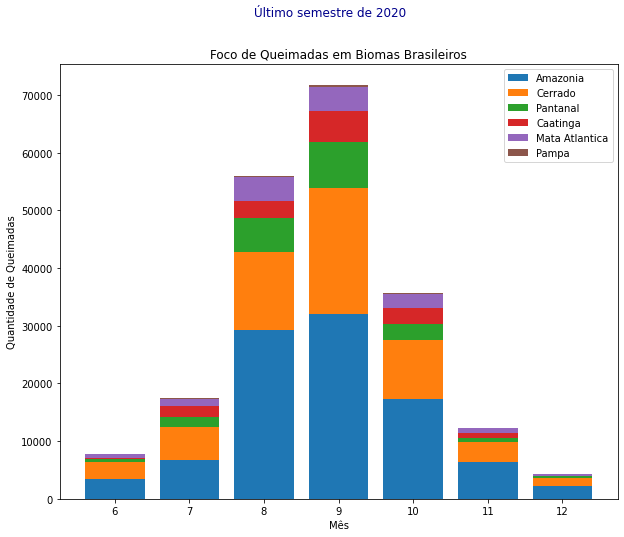

In [294]:
plt.figure(figsize=(10,8))
altura = 0

for bioma in biomas:
    plt.bar(meses, df_col_emp[bioma], label=bioma, bottom=altura)
    altura = altura + df_col_emp[bioma].values
    
plt.ylabel('Quantidade de Queimadas')
plt.xlabel('Mês')
plt.title('Foco de Queimadas em Biomas Brasileiros')
plt.suptitle('Último semestre de 2020', color='#00008B')
plt.legend()
plt.show()

##**Gráfico 100% Empilhado**

In [290]:
lista = []
for mes in meses:
    lista.append(df_col_emp.loc[mes].values / df_col_emp.loc[mes].sum())
df_col_emp_100 = pd.DataFrame(np.matrix(lista), index=meses, columns=biomas)
df_col_emp_100

,Amazonia,Cerrado,Pantanal,Caatinga,Mata Atlantica,Pampa
9,0.445857,0.303607,0.112881,0.072775,0.059588,0.005292
8,0.524407,0.240490,0.106198,0.054343,0.072988,0.001575
10,0.485880,0.284781,0.080092,0.075325,0.071595,0.002328
7,0.389834,0.324509,0.096499,0.109564,0.075755,0.003839
11,0.514195,0.283657,0.063288,0.068169,0.065240,0.005450
6,0.444785,0.377505,0.051832,0.033831,0.086302,0.005745
12,0.517615,0.325812,0.051347,0.019111,0.077366,0.008750


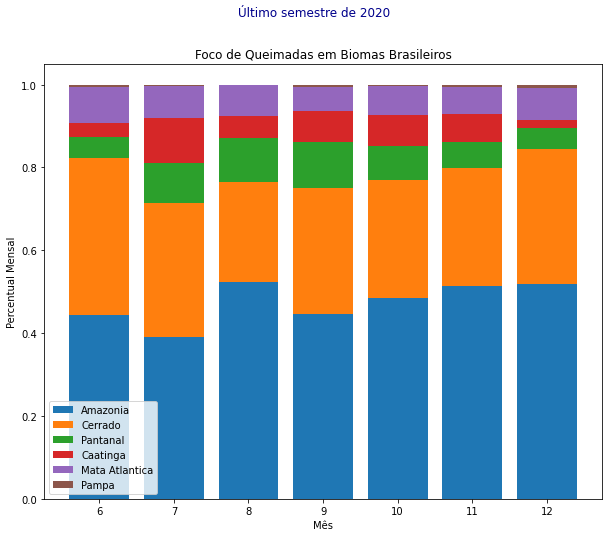

In [295]:
plt.figure(figsize=(10,8))
altura = 0

for bioma in biomas:
    plt.bar(meses, df_col_emp_100[bioma], label=bioma, bottom=altura)
    altura = altura + df_col_emp_100[bioma].values
    
plt.ylabel('Percentual Mensal')
plt.xlabel('Mês')
plt.title('Foco de Queimadas em Biomas Brasileiros')
plt.suptitle('Último semestre de 2020', color='#00008B')
plt.legend()
plt.show()